In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [192]:
dfc=pd.read_csv('Customers.csv')

In [3]:
dfc.head()

CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

In [4]:
dfp=pd.read_csv('Products.csv')

In [5]:
dfp.head()

ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

In [6]:
dft=pd.read_csv('Transactions.csv')

In [7]:
dft.head()

TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68

In [8]:
dfc.head()

CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

In [9]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [10]:
dfc.describe()

CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3

In [11]:
dfc.shape

(200, 4)

In [12]:
dfc.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [14]:
dfc.head()

CustomerID         Region  SignupDate
0      C0001  South America  2022-07-10
1      C0002           Asia  2022-02-13
2      C0003  South America  2024-03-07
3      C0004  South America  2022-10-09
4      C0005           Asia  2022-08-15

In [15]:
dfc.columns

Index(['CustomerID', 'Region', 'SignupDate'], dtype='object')

In [16]:
dfc['Signupdate']=pd.to_datetime(dfc['SignupDate'])

In [17]:
dfc.drop(columns=['SignupDate'],inplace=True)

In [18]:
dfc[dfc.duplicated()=='True'].count()

CustomerID    0
Region        0
Signupdate    0
dtype: int64

<Axes: xlabel='Region', ylabel='Signupdate'>

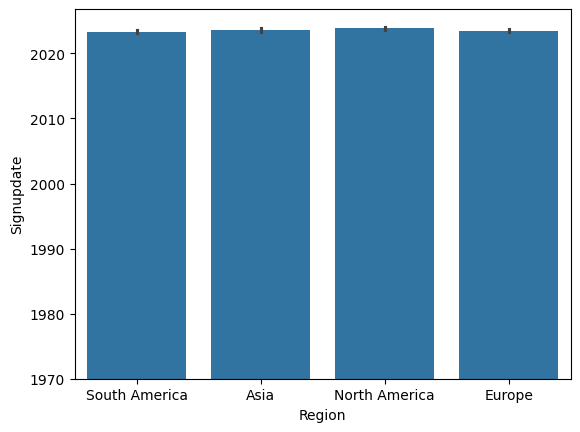

In [19]:
sns.barplot(data=dfc,x=dfc['Region'],y=dfc['Signupdate'])
#dfc.date

In [20]:
dfc.Region.value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [21]:
region_counts = dfc.groupby('Signupdate')['Region'].value_counts().reset_index(name='count')

In [22]:
df=dfc.groupby('Signupdate')['Region'].value_counts().reset_index(name='count')

In [23]:
type(df)
df.columns

Index(['Signupdate', 'Region', 'count'], dtype='object')

In [24]:
dfc.head()

CustomerID         Region Signupdate
0      C0001  South America 2022-07-10
1      C0002           Asia 2022-02-13
2      C0003  South America 2024-03-07
3      C0004  South America 2022-10-09
4      C0005           Asia 2022-08-15

In [25]:
dfc.groupby('Region')['CustomerID'].value_counts()

Region         CustomerID
Asia           C0002         1
               C0005         1
               C0007         1
               C0021         1
               C0022         1
                            ..
South America  C0188         1
               C0190         1
               C0191         1
               C0192         1
               C0195         1
Name: count, Length: 200, dtype: int64

In [26]:
dfc.Region.unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [27]:
import pandas as pd
from pandas_profiling import ProfileReport

C:\Users\arifu\AppData\Local\Temp\ipykernel_10040\3034448462.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [28]:
import pandas as pd
from ydata_profiling import ProfileReport


In [29]:
from pydantic_settings import BaseSettings

In [32]:
import pandas as pd
import pandas_profiling
from ydata_profiling import ProfileReport


profile = pandas_profiling.ProfileReport(dfc)
profile.to_file("customer_report.html") # or profile.to_notebook_iframe() if in a notebook.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
profile.to_notebook_iframe()

In [40]:
monthly=dfc.groupby(pd.Grouper(key='Signupdate',freq='ME')).size()


In [37]:
ex.histogram(data_frame=monthly)

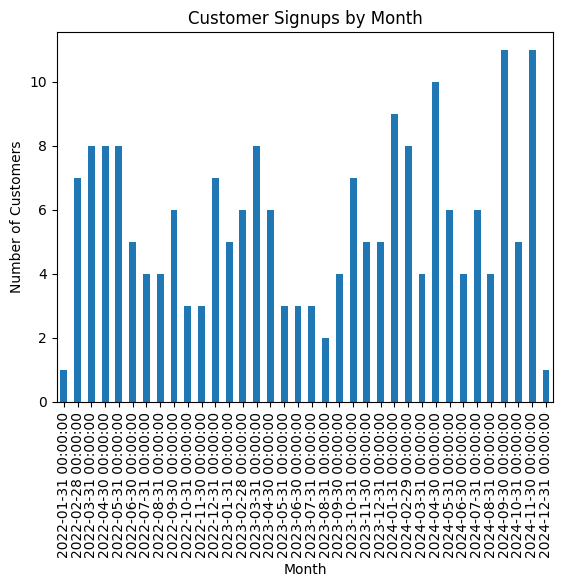

In [41]:
monthly.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customer Signups by Month')
plt.show()

np.int64(11)


HYPOTHESES:

Based on the profiling report , I have formulated the following hypotheses:

Hypothesis1: North America and Asia need attention as customers from these regions are less

Hypothesis 2: 

Yearly Variation:2024 experienced the highest customer signup numbers.2022 and 2023 demonstrated more moderate signup levels.
Monthly Fluctuations:Some months consistently experience high customer signups.Certain months consistently experience low customer signups.


Hypothesis 3:There may be recurring patterns in customer signups across different times of the year.(seasonl patterns)




Counting signups per year and month
monthly_signups = df.groupby(["Year", "Month"]).size().reset_index(name="SignupCount")
monthly_signupsHere’s a breakdown of customer signups per month and year based on the data:

2022
January: 1 signup
February: 5 signups
March: 5 signups
April: 6 signups
May: 6 signups
June: 4 signups
July: 4 signups
August: 4 signups
September: 5 signups
October: 1 signup
November: 2 signups
December: 4 signups
2023
January: 5 signups
February: 5 signups
March: 7 signups
April: 5 signups
May: 3 signups
July: 3 signups
August: 2 signups
September: 3 signups
October: 4 signups
November: 3 signups
December: 5 signups
2024
January: 6 signups
February: 8 signups
March: 4 signups
April: 9 signups
May: 4 signups
June: 3 signups
July: 6 signups
August: 3 signups
September: 9 signups
October: 5 signups
November: 11 signups

These numbers indicate that signups peaked in NOVEMBER 2024 and APRIL 2024


PRODUCTS ANALYSIS

In [42]:
dfp.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [43]:
dfp.describe()

Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

In [44]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [46]:
dfp.Category.unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

In [49]:
dfp.Price.describe()

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

In [50]:
dfp.shape

(100, 4)

In [207]:
# import pandas_profiling
# from ydata_profiling import ProfileReport

# file=pandas_profiling.ProfileReportt(dfp)
# file.to_file('product.html')

In [54]:
import pandas as pd
import pandas_profiling
from ydata_profiling import ProfileReport


profile = pandas_profiling.ProfileReport(dfp)
profile.to_file("product_report.html") # or profile.to_notebook_iframe() if in a notebook.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
profile.to_notebook_iframe()

In [58]:
dfp.groupby(['Category','Price']).sum()

ProductID              ProductName
Category   Price                                    
Books      33.59       P063            TechPro Novel
           44.12       P003  ComfortLiving Biography
           57.30       P054       SoundWave Cookbook
           100.81      P069      BookWorld Biography
           128.53      P055      BookWorld Biography
...                     ...                      ...
Home Decor 335.84      P021            SoundWave Rug
           337.91      P084      ActiveWear Wall Art
           417.37      P079           ActiveWear Rug
           447.34      P094   HomeSense Cookware Set
           454.53      P023  ActiveWear Cookware Set

[100 rows x 2 columns]

In [60]:
dfp.groupby('Category')['Price'].sum()

Category
Books          7597.52
Clothing       6593.00
Electronics    7159.19
Home Decor     5405.46
Name: Price, dtype: float64

In [174]:
len(dfp['ProductName'].unique())

66

In [175]:
len(dfp['ProductID'].unique())

100

Analysis revealed that there are 66 unique product names but 100 unique product IDs. This suggests potential data inconsistencies, such as duplicate product names or incorrect product IDs

In [ ]:
dfp.aggregate(['max'])

ProductID   ProductName    Category   Price
max      P100  TechPro Vase  Home Decor  497.76

In [86]:
large=dfp.nlargest(50,'Price')

In [87]:
large.groupby('Category').size()

Category
Books          15
Clothing       14
Electronics    13
Home Decor      8
dtype: int64

In [89]:
small=dfp.nsmallest(50,'Price')

In [90]:
small.groupby('Category').size()

Category
Books          11
Clothing       11
Electronics    13
Home Decor     15
dtype: int64

In [96]:
dfp.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [102]:
dfp.Category.unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

In [100]:
dfp[dfp['Category']=='Books']['Price'].nlargest(5)

74    497.76
31    488.63
16    469.77
67    447.23
85    440.70
Name: Price, dtype: float64

In [103]:
dfp[dfp['Category']=='Home Decor']['Price'].nlargest(5)

22    454.53
93    447.34
78    417.37
83    337.91
20    335.84
Name: Price, dtype: float64

The pricing distribution across the top 50 high-priced commodities, it was observed that books represented the highest-priced category, while home decor items consistently featured among the lower-priced commodities. 

Insights on Clothing Products-->
The clothing category contains several activewear and soundwave-branded items.
SoundWave T-shirts (highest price $481.78) and ActiveWear Running Shoes ($18.82) have the most variation in price

Insights on Electronics:
The most expensive electronics item is the SoundWave Smartwatch ($459.86), while the cheapest is SoundWave Smartwatch at $16.08.
Many electronics items like headphones, smartwatches, and speakers dominate the category.


There’s a balanced distribution of items like rugs, wall art, and cookware sets across the prices.

"ActiveWear" and "SoundWave" are the most frequent product names across categories. These brands are ,ost likelydominant, especially in the Clothing and Electronics categories.

The highest concentration of products falls in Home Decor, followed by Electronics, Books, and Clothing

TRANSACTION ANALYSIS

In [104]:
dft.head()

TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68

In [105]:
dft.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [106]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [109]:
dft.shape

(1000, 7)

In [107]:
dft.describe()

Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000

In [108]:
profile=pandas_profiling.ProfileReport(dft)
profile.to_file('transaction_report.html')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Strong Positive Correlation: There's a very strong positive correlation (0.92) between "TotalValue" and "Quantity". This indicates that as the quantity of items increases, the total value also tends to increase proportionally. This is logical in a sales context.


Moderate Positive Correlation: There's a moderate positive correlation (0.57) between "TotalValue" and "Price". This suggests that higher prices are somewhat associated with higher total values. However, the correlation is not as strong as between "TotalValue" and "Quantity", implying that other factors (like quantity) also significantly influence the total value.


Weak Positive Correlation: There's a weak positive correlation (0.28) between "Price" and "Quantity". This means there's a slight tendency for higher prices to be associated with higher quantities, but the relationship is not very pronounced. This could be due to various reasons such as discounts for bulk purchases or different customer segments having varying price and quantity preferences.

In [110]:
dft.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [114]:
dft['TransactionDate']=pd.to_datetime(dft['TransactionDate'])

In [118]:
dft.groupby('TransactionDate').sum()

TransactionID CustomerID ProductID  Quantity  TotalValue  \
TransactionDate                                                                
2023-12-30 15:29:12        T00869      C0081      P061         2      313.92   
2023-12-31 03:27:43        T00605      C0017      P057         4      958.80   
2023-12-31 06:53:54        T00154      C0040      P020         4     1585.36   
2023-12-31 15:44:04        T00845      C0154      P083         2      911.44   
2024-01-01 03:54:19        T00818      C0161      P049         1      147.95   
...                           ...        ...       ...       ...         ...   
2024-12-26 14:40:03        T00442      C0188      P067         1      300.68   
2024-12-26 21:34:07        T00698      C0119      P011         1      261.20   
2024-12-27 17:31:24        T00374      C0181      P038         2      294.44   
2024-12-27 18:20:31        T00951      C0197      P027         2      458.12   
2024-12-28 11:00:00        T00333      C0101      P015         3      476.79   

                      Price  
TransactionDate              
2023-12-30 15:29:12  156.96  
2023-12-31 03:27:43  239.70  
2023-12-31 06:53:54  396.34  
2023-12-31 15:44:04  455.72  
2024-01-01 03:54:19  147.95  
...                     ...  
2024-12-26 14:40:03  300.68  
2024-12-26 21:34:07  261.20  
2024-12-27 17:31:24  147.22  
2024-12-27 18:20:31  229.06  
2024-12-28 11:00:00  158.93  

[1000 rows x 6 columns]

In [119]:
monthly=dft.groupby(pd.Grouper(key='TransactionDate',freq='ME')).size()


In [120]:
monthly

TransactionDate
2023-12-31      4
2024-01-31    107
2024-02-29     77
2024-03-31     80
2024-04-30     86
2024-05-31     86
2024-06-30     69
2024-07-31     96
2024-08-31     94
2024-09-30     96
2024-10-31     70
2024-11-30     57
2024-12-31     78
Freq: ME, dtype: int64

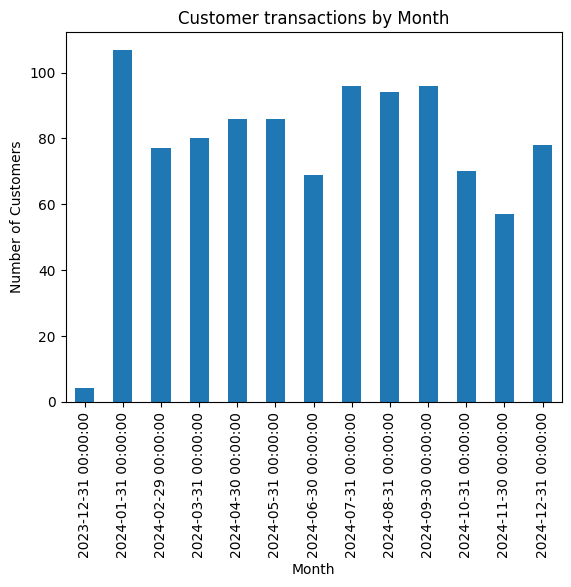

In [122]:
monthly.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customer transactions by Month')
plt.show()

Peak Months:

January 2024: Shows a substantial peak in customer transactions.
July 2024: Also demonstrates a noticeable increase in transactions.

Lowest Months:

December 2023: Appears to have the lowest number of transactions among the displayed months.
October 2024: Also shows a relatively low level of customer activity

In [124]:
len(dft['ProductID'].unique())

100

In [125]:
dft.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [126]:
dft.head()

TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68

In [ ]:
#which has highest total value,which has highest quantity?

In [176]:
maxdf=dft.groupby('ProductID')['TotalValue'].sum().nlargest()
maxdf = pd.DataFrame(maxdf, columns=['TotalValue'])
maxdf.reset_index(inplace=True)

In [177]:
maxdf

ProductID  TotalValue
0      P029    19513.80
1      P079    17946.91
2      P048    17905.20
3      P020    15060.92
4      P062    14592.24

In [178]:
dfp.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [179]:
maxdf['ProductID']

0    P029
1    P079
2    P048
3    P020
4    P062
Name: ProductID, dtype: object

In [152]:

dfp_top5 = dfp[dfp['ProductID'].isin(maxdf['ProductID'])]

In [154]:
dfp_top5['ProductName']

19     ActiveWear Jacket
28    TechPro Headphones
47      TechPro Cookbook
61       HomeSense Novel
78        ActiveWear Rug
Name: ProductName, dtype: object

Based on the analysis, the products "ActiveWear Jacket," "TechPro Headphones," "TechPro Cookbook," "HomeSense Novel," and "ActiveWear Rug" demonstrated the strongest performance in terms of total value generated. Thud these can be BEST SELLING

In [155]:
mindf=dft.groupby('ProductID')['TotalValue'].sum().nsmallest()
mindf = pd.DataFrame(mindf, columns=['TotalValue'])
mindf.reset_index(inplace=True)

In [158]:
mindf

ProductID  TotalValue
0      P044      244.66
1      P056      337.68
2      P014      367.64
3      P073      647.76
4      P070      730.35

In [161]:
maxdf

ProductID  TotalValue
0      P029    19513.80
1      P079    17946.91
2      P048    17905.20
3      P020    15060.92
4      P062    14592.24

In [180]:

dfp_bottom5 = dfp[dfp['ProductID'].isin(mindf['ProductID'])]

In [181]:
dfp_bottom5

ProductID               ProductName     Category  Price
13      P014         ActiveWear Jacket     Clothing  26.26
43      P044  ActiveWear Running Shoes     Clothing  18.82
55      P056      SoundWave Smartwatch  Electronics  16.08
69      P070         HomeSense T-Shirt     Clothing  48.69
72      P073      ComfortLiving Laptop  Electronics  26.99

In [182]:
dfp_top5

ProductID         ProductName     Category   Price
19      P020   ActiveWear Jacket     Clothing  396.34
28      P029  TechPro Headphones  Electronics  433.64
47      P048    TechPro Cookbook        Books  416.40
61      P062     HomeSense Novel        Books  374.16
78      P079      ActiveWear Rug   Home Decor  417.37

In [183]:
dft.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [189]:
custmax=dft.groupby('CustomerID')['TotalValue'].sum().nlargest()
custmax=pd.DataFrame(custmax)
custmax.reset_index(inplace=True)

In [190]:
custmax.columns

Index(['CustomerID', 'TotalValue'], dtype='object')

In [194]:
dfc[dfc['CustomerID'].isin(custmax['CustomerID'])]['CustomerName']

53      Bruce Rhodes
64      Gerald Hines
81      Aimee Taylor
140     Paul Parsons
155    William Adams
Name: CustomerName, dtype: object

The analysis has identified a group of high-value customers, including Bruce Rhodes, Gerald Hines, Aimee Taylor, Paul Parsons, and William Adams, who have demonstrated significant contributions to overall revenue.Thus they are HIGH VALUE CUSOTMERS

In [198]:
loyal=dft.groupby('CustomerID').size().nlargest()
loyal=pd.DataFrame(loyal)
loyal.reset_index(inplace=True)

In [201]:
dfc[dfc['CustomerID'].isin(loyal['CustomerID'])]['CustomerName']

7           David Li
64      Gerald Hines
108    Abigail Jones
140     Paul Parsons
155    William Adams
Name: CustomerName, dtype: object

Analysis reveals that David Li, Gerald Hines, Abigail Jones, Paul Parsons, and William Adams are identified as high-value customers based on their high transaction frequency.Thus they are LOYAL CUSTOMERS

In [205]:
avgval=dft['TotalValue'].mean()
avgval

np.float64(689.9955600000001)

In [206]:
dft['TotalValue']/avgval

0      0.435771
1      0.435771
2      0.435771
3      0.871542
4      1.307313
         ...   
995    0.666468
996    1.999404
997    2.665872
998    1.332936
999    0.666468
Name: TotalValue, Length: 1000, dtype: float64